# Personalised Medicine - EDA with tidy Python
* 1 Introduction
    + 1.1 Load libraries and data files
* 2 The variants data tables
    + 2.1 First table overviews of the data:
    + 2.2 Individual feature visualisations
    + 2.3 Feature interactions
        - 2.3.1 Gene vs Class
        - 2.3.2 Gene vs Variation
* 3 The text files
    + 3.1 Overview
    + 3.2 On data cleaning and preparations
    + 3.3 Feature Engineering
        - 3.3.1 Text length - txt_len
        - 3.3.2 Missing text values
        - 3.3.3 Keyword frequency - pedestrian approach
    + 3.4 First steps into text analysis with tidytext
    + 3.5 Class-dependent word frequencies
    + 3.6 TF-IDF analysis - basics and application
    + 3.7 Word pair frequencies: n-grams
    + 3.8 NEW: Networks of bigrams
    + 3.9 Individual Class networks

## 1 Introduction

### 1.1 Load libraries and data files

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)

Reading in the variants data tables:

In [9]:
address_prefix = 'E:/BigDataMatch/Kaggle-Personalized-Medicine/data/'
train = pd.read_csv(address_prefix + 'training_variants')
test = pd.read_csv(address_prefix + 'test_variants')

# change source data from 'ID,Text' to 'ID||Text'
train_txt = pd.read_csv(address_prefix + 'training_text', sep = '\|\|', engine='python')
del train_txt['ID']
test_txt = pd.read_csv(address_prefix + 'test_text', sep='\|\|', engine='python')
del test_txt['ID']

## 2 The variants data tables

### 2.1 First table overviews of the data:

In [158]:
test.describe()

,ID
count,5668.000000
mean,2833.500000
std,1636.354994
min,0.000000
25%,1416.750000
50%,2833.500000
75%,4250.250000
max,5667.000000


In [159]:
train.head(15)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4
5,5,CBL,V391I,4
6,6,CBL,V430M,5
7,7,CBL,Deletion,1
8,8,CBL,Y371H,4
9,9,CBL,C384R,4


In [160]:
test.head(15)

,ID,Gene,Variation
0,0,ACSL4,R570S
1,1,NAGLU,P521L
2,2,PAH,L333F
3,3,ING1,A148D
4,4,TMEM216,G77A
5,5,CD40LG,A123E
6,6,KLF11,T220M
7,7,SGCB,T151R
8,8,CLCF1,R197L
9,9,SDHAF1,R55P


In [161]:
print("train_shape:", train.shape, "test_shape:", test.shape)

train_shape: (3321, 4) test_shape: (5668, 3)


In [162]:
train['Gene'].value_counts()

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
PIK3CA     56
CDKN2A     52
FGFR2      50
FLT3       49
TSC2       47
MTOR       45
KRAS       44
MAP2K1     43
VHL        41
RET        40
FGFR3      39
MLH1       35
SMAD4      33
JAK2       33
MET        33
NOTCH1     31
AKT1       28
ABL1       26
ROS1       26
PTPN11     26
         ... 
FAM58A      1
BCL2        1
GNA11       1
ASXL2       1
FGF19       1
CEBPA       1
SHQ1        1
RAD51B      1
BARD1       1
IKBKE       1
SDHC        1
PIK3R3      1
JUN         1
ARID5B      1
CTLA4       1
WHSC1       1
FGF4        1
TCF7L2      1
RARA        1
SRSF2       1
CDKN2C      1
DUSP4       1
RAD54L      1
RRAS2       1
CDK8        1
GNAQ        1
IL7R        1
HLA-B       1
SDHB        1
TCF3        1
Name: Gene, Length: 264, dtype: int64

In [163]:
train['Variation'].value_counts()

Truncating Mutations            93
Deletion                        74
Amplification                   71
Fusions                         34
Overexpression                   6
G12V                             4
T58I                             3
Q61H                             3
Q61L                             3
Q61R                             3
E17K                             3
I31M                             2
P130S                            2
Promoter Hypermethylation        2
G13C                             2
F384L                            2
K117N                            2
Q209L                            2
V321M                            2
ETV6-NTRK3 Fusion                2
A146V                            2
G67R                             2
Y64A                             2
G13D                             2
R170W                            2
A146T                            2
T286A                            2
S308A                            2
G12C                

In [164]:
train['Class'].value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [165]:
test['Gene'].value_counts()

F8          134
CFTR         57
F9           54
G6PD         46
GBA          39
PAH          38
AR           38
CASR         37
ARSA         30
SCN4A        29
VWF          29
BRCA1        29
SCN5A        27
GLA          26
LDLR         24
HPRT1        24
HEXA         24
LPL          23
TSHR         23
OAT          22
ABCA4        22
TYR          22
KCNQ1        21
BTK          20
PTEN         20
HMBS         19
BEST1        19
TP53         19
PROC         18
NPC1         17
           ... 
PDSS1         1
CST3          1
PCCA          1
DOCK8         1
FGFR1         1
SIX6          1
FAT1          1
SLC25A12      1
ZNF513        1
RFXANK        1
TUFM          1
ALG2          1
C1QTNF5       1
SIL1          1
FOXRED1       1
PPP1R3A       1
ATP13A2       1
MUSK          1
HIBCH         1
FXYD2         1
BRD4          1
FOXC2         1
TGFB1         1
BANK1         1
MYC           1
GRXCR1        1
ARID1A        1
ANOS1         1
HTRA1         1
NOTCH2        1
Name: Gene, Length: 1397

In [166]:
test['Variation'].value_counts()

Truncating Mutations    18
Deletion                14
Amplification            8
Fusions                  3
G44D                     2
M296I                    1
N93S                     1
A114V                    1
A553T                    1
L242R                    1
S549N                    1
V114I                    1
G598V                    1
V14L                     1
D464G                    1
E330A                    1
G299E                    1
R465W                    1
I629V                    1
P334R                    1
I205T                    1
R2228G                   1
R611C                    1
YAP1-TFE3 Fusion         1
C345R                    1
P128L                    1
D203Y                    1
L924P                    1
P299L                    1
Y251H                    1
                        ..
F573S                    1
T791M                    1
I141V                    1
Q421K                    1
S341L                    1
N499S                    1
R

In [167]:
train.isnull().sum()

ID           0
Gene         0
Variation    0
Class        0
dtype: int64

In [168]:
test.isnull().sum()

ID           0
Gene         0
Variation    0
dtype: int64

### 2.2 Individual feature visualisations

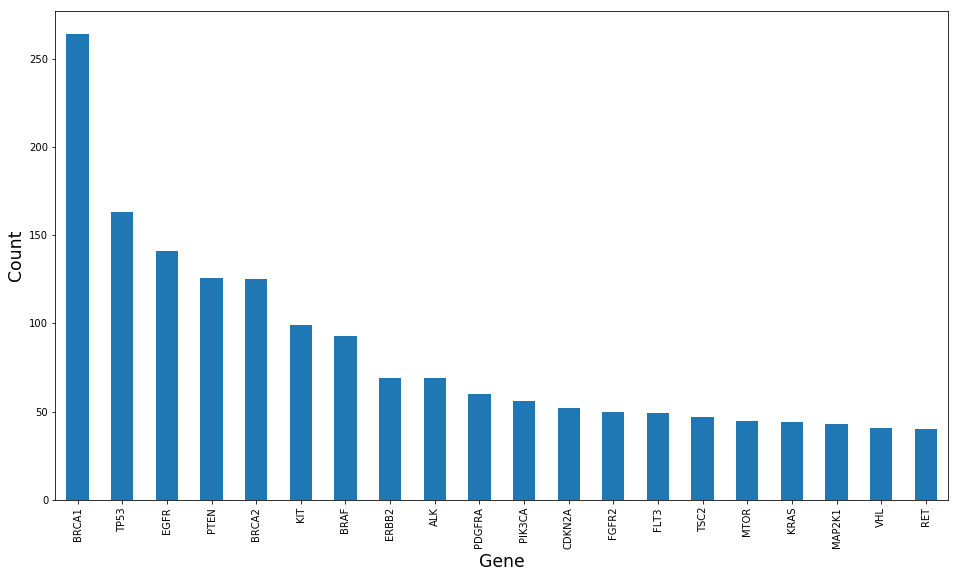

In [169]:
ax = train['Gene'].value_counts()[:20].plot.bar()
ax.set_xlabel("Gene",size='xx-large')
ax.set_ylabel("Count",size='xx-large')
plt.show()

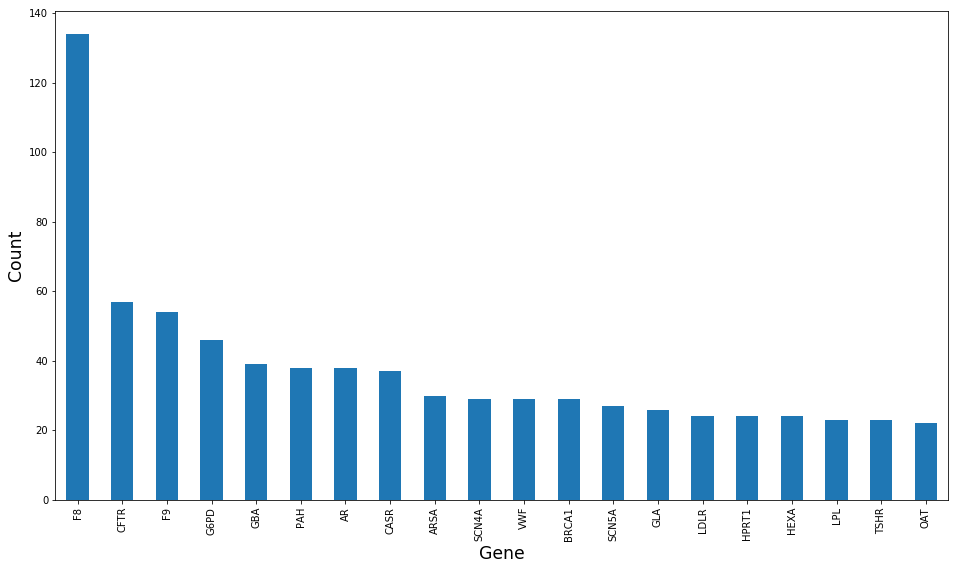

In [170]:
ax = test['Gene'].value_counts()[:20].plot.bar()
ax.set_xlabel("Gene", size='xx-large')
ax.set_ylabel("Count", size='xx-large')
plt.show()

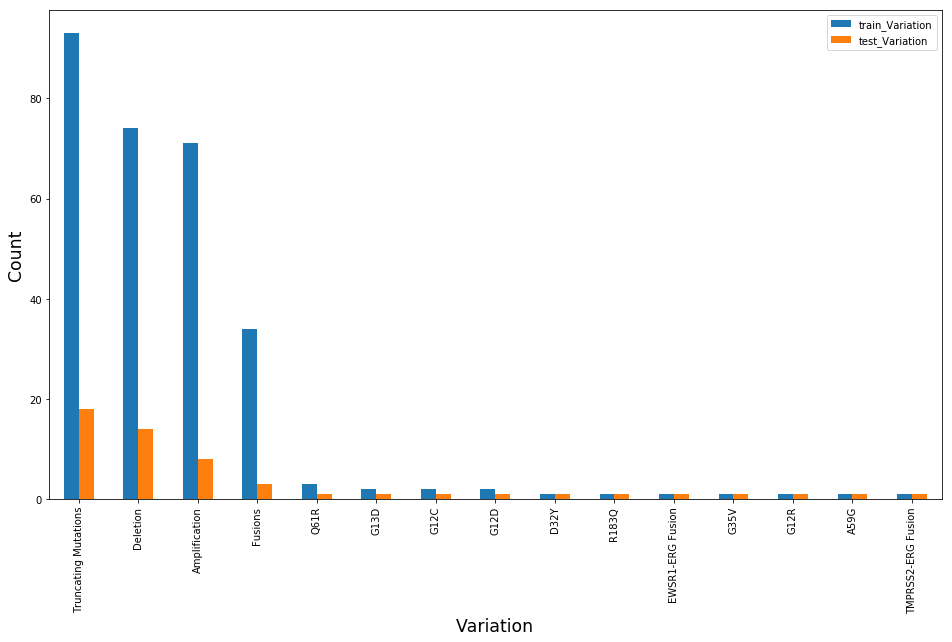

In [171]:
train_Variation_value_counts = train['Variation'].value_counts()
train_Variation_value_counts.name = 'train_Variation'
test_Variation_value_counts = test['Variation'].value_counts()
test_Variation_value_counts.name = 'test_Variation'
ax = pd.concat([train_Variation_value_counts, test_Variation_value_counts], axis=1, join='inner').plot.bar()
ax.set_xlabel("Variation", size='xx-large')
ax.set_ylabel("Count", size='xx-large')
plt.show()

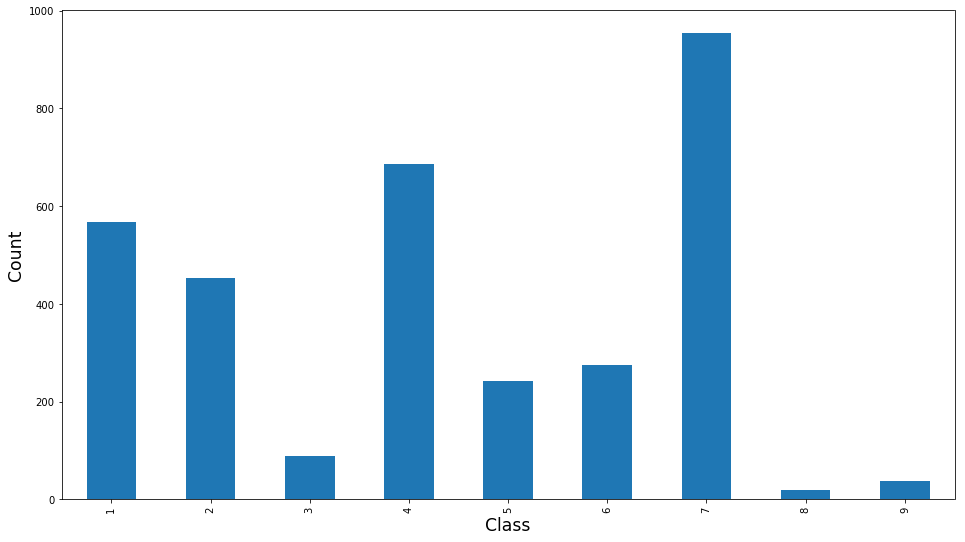

In [172]:
ax = train['Class'].value_counts().sort_index().plot.bar()
ax.set_xlabel("Class", size='xx-large')
ax.set_ylabel("Count", size='xx-large')
plt.show()

## 2.3 Feature interactions

#### 2.3.1 Genes vs Class

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


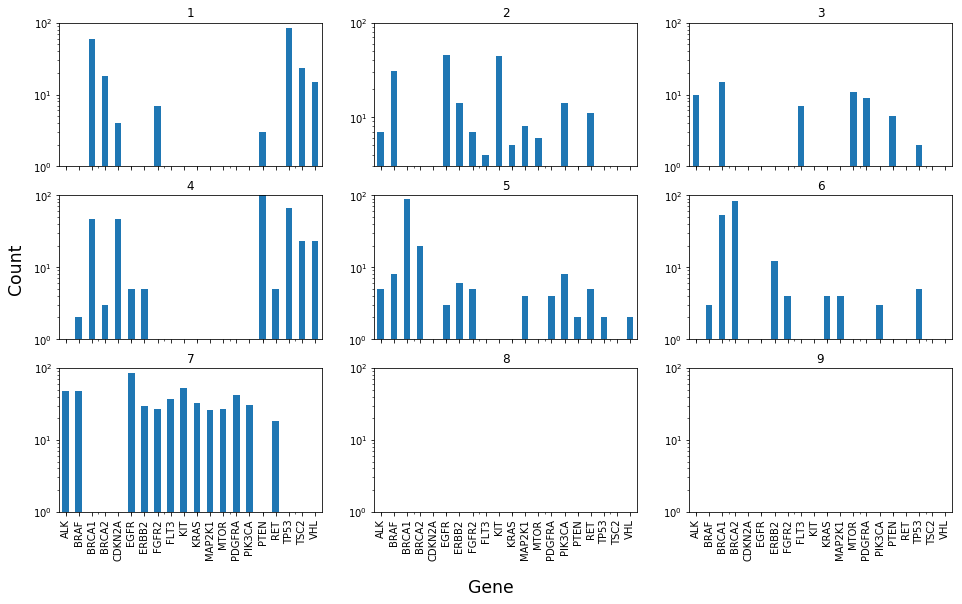

In [173]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True)
standard_index = train['Gene'].value_counts()[:20].sort_index().index
for i in range(9):
    current_series = train[train['Class']==(i+1)]['Gene'].value_counts()[standard_index].fillna(0).astype(np.int64)
    ax = current_series.plot(ax=axes[i//3,i%3], kind='bar', logy=True)
    ax.set_ylim(0,100)
    ax.set_title(i+1)
fig.text(0.5, 0, 'Gene', ha='center',size='xx-large')
fig.text(0.08, 0.5, 'Count', va='center', rotation='vertical', size='xx-large')
plt.show()

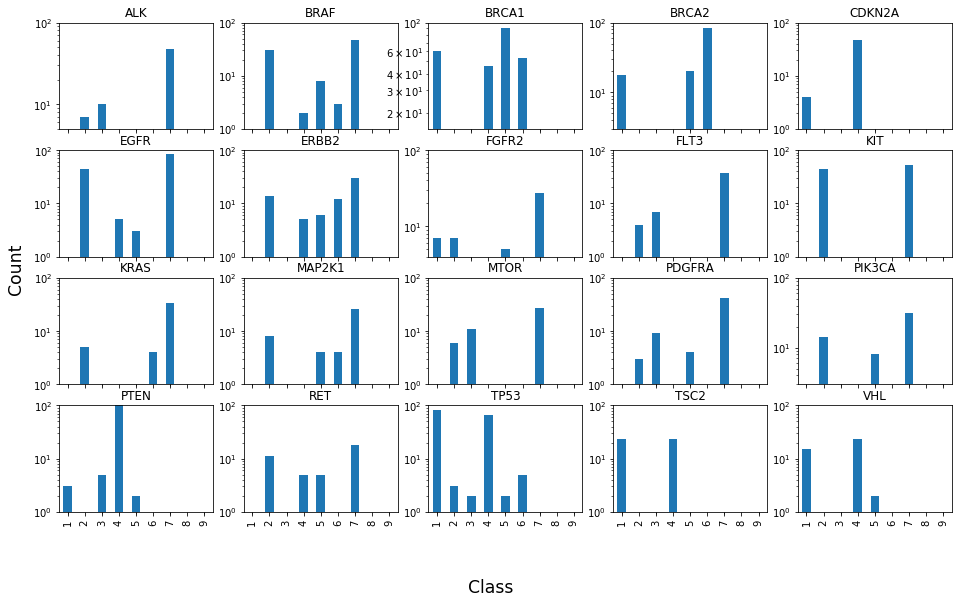

In [174]:
fig, axes = plt.subplots(nrows=4, ncols=5, sharex=True)
most_frequent_Genes = train['Gene'].value_counts()[:20].sort_index().index
ind = 0
for gene in most_frequent_Genes:
    current_series = train[train['Gene']==gene]['Class'].value_counts()
    new_series = pd.Series(np.zeros(9),index=range(1,10))
    new_series[current_series.index] = current_series.values
    new_series.astype(np.int64)
    ax = new_series.plot(ax=axes[ind // 5, ind % 5], kind='bar', logy=True)
    ax.set_ylim(0,100)
    ax.set_title(gene)
    ind += 1
fig.text(0.5, 0, 'Class', ha='center', size='xx-large')
fig.text(0.08, 0.5, 'Count', va='center', rotation='vertical', size='xx-large')
plt.show()

## 3 The text files

### 3.1 Overview

In [13]:
train_txt['Text'][0][:1000]

'Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

### 3.2 On data cleaning and preparations

### 3.3 Feature Engineering

#### 3.3.1 Text length - txt_len

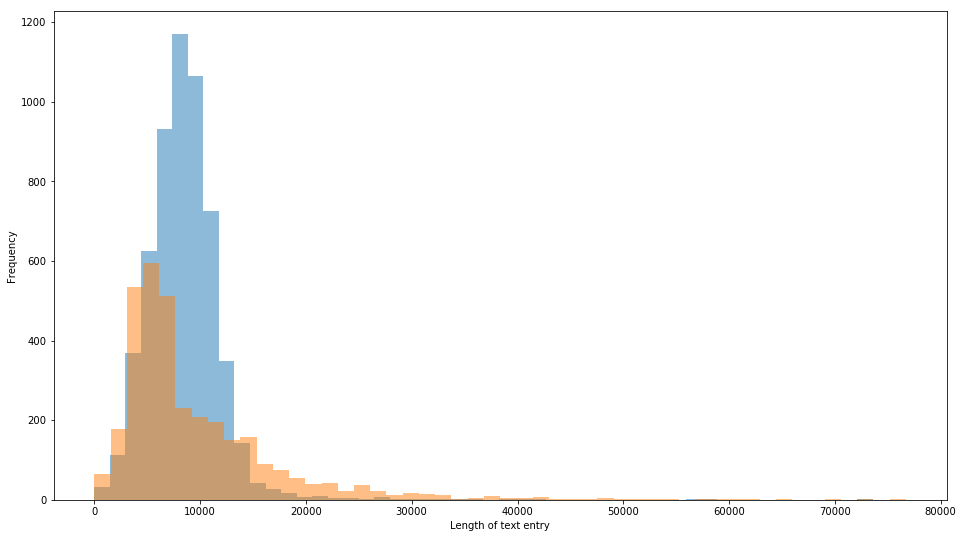

In [32]:
train_txt['txt_len'] = train_txt['Text'].apply(lambda x : len(x.split()))
test_txt['txt_len'] = test_txt['Text'].apply(lambda x : len(x.split()))

test_txt['txt_len'].plot.hist(bins = 50,alpha=0.5)
train_txt['txt_len'].plot.hist(bins = 50,alpha=0.5)
plt.xlabel('Length of text entry')
plt.show()

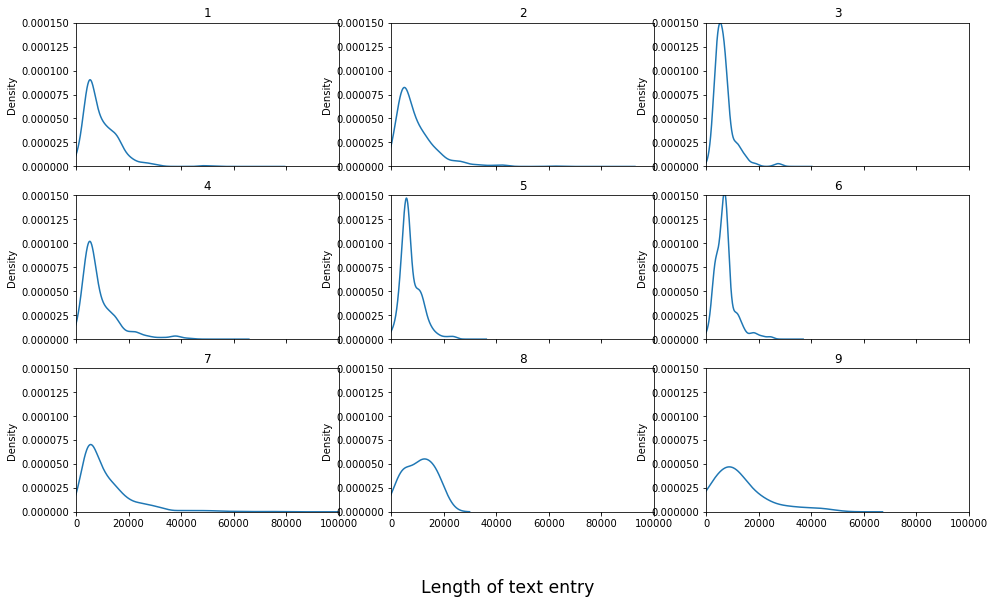

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True)
for i in range(9):
    ax = train_txt['txt_len'][train[train['Class']==(i+1)].index].plot(ax=axes[i//3,i%3], kind='kde')
    ax.set_ylim(0,0.00015)
    ax.set_xlim(0,100000)
    ax.set_title(i+1)
fig.text(0.5, 0, 'Length of text entry', ha='center',size='xx-large')
plt.show()

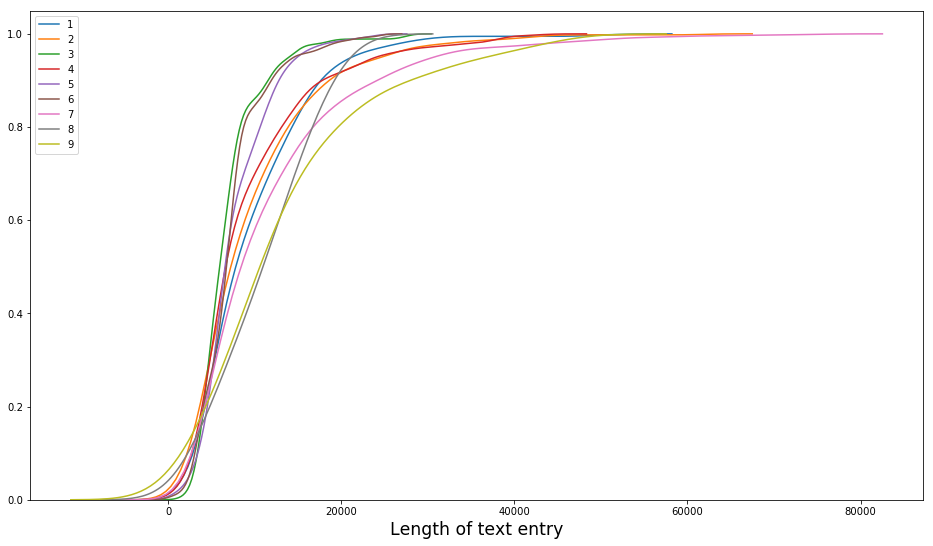

In [44]:
for i in range(9):
    sns.distplot(train_txt['txt_len'][train[train['Class']==(i+1)].index].values, kde_kws=dict(cumulative=True,label=str(i+1)))
fig.text(0.5, 0, 'Length of text entry', ha='center',size='xx-large')
plt.xlabel('Length of text entry', size='xx-large')
plt.show()